In [3]:
import ee 
import folium
import geehydro
from datetime import datetime as dt
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Autheticate and then initialize the session using your credentials
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/ywGvK_5hJbV4M2CqsmJ5JP0VEAHcBo0a1Q893h2acN03b1IQ-r2rvPY

Successfully saved authorization token.


(373, 531)
(373, 531)
(373, 531)
(373, 531, 1)
(373, 531, 1)
(373, 531, 1)
(373, 531, 3)


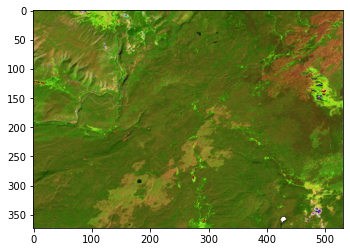

In [6]:
# Source:
# https://gis.stackexchange.com/questions/350771/earth-engine-simplest-way-to-move-from-ee-image-to-array-for-use-in-sklearn

# Define an image.
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

# Define an area of interest.
aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = img.sampleRectangle(region=aoi)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

# Transfer the arrays from server to client and cast as np array.
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())
print(np_arr_b4.shape)
print(np_arr_b5.shape)
print(np_arr_b6.shape)

# Expand the dimensions of the images so they can be concatenated into 3-D.
np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)
print(np_arr_b4.shape)
print(np_arr_b5.shape)
print(np_arr_b6.shape)

# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b6, np_arr_b5, np_arr_b4), 2)
print(rgb_img.shape)

# Scale the data to [0, 255] to show as an RGB image.
rgb_img_test = (255*((rgb_img - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

(373, 531, 3)


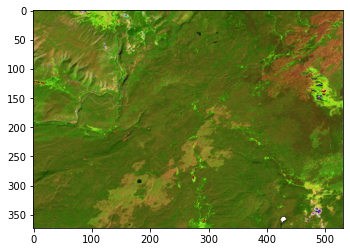

In [20]:
# Source:
# https://gis.stackexchange.com/questions/350771/earth-engine-simplest-way-to-move-from-ee-image-to-array-for-use-in-sklearn

# Define an image.
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

#collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA').select(['B4', 'B5', 'B6'])
#collection_time = collection.filterDate('2017-01-01', '2018-01-01') 
#img = collection_time.sort('CLOUD_COVER').first()

# Define an area of interest.
aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = img.sampleRectangle(region=aoi)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

# Transfer the arrays from server to client and cast as np array.
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())

# Expand the dimensions of the images so they can be concatenated into 3-D.
np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)


# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b6, np_arr_b5, np_arr_b4), 2)
print(rgb_img.shape)

# Scale the data to [0, 255] to show as an RGB image.
rgb_img_test = (255*((rgb_img - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [147]:
import ee
from ee import batch

## Initialize connection to server
ee.Initialize()

## Define your image collection 
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

## Define time range
collection_time = collection.filterDate('2000-04-11', '2018-01-01') #YYYY-MM-DD

## Select location based on location of tile
path = collection_time.filter(ee.Filter.eq('WRS_PATH', 198))
pathrow = path.filter(ee.Filter.eq('WRS_ROW', 24))

# or via geographical location:
#point_geom = ee.Geometry.Point(5, 52) #longitude, latitude
#pathrow = collection_time.filterBounds(point_geom)

## Select imagery with less then 5% of image covered by clouds
clouds = pathrow.filter(ee.Filter.lt('CLOUD_COVER', 5))

## Select bands
bands = clouds.select(['B4', 'B5', 'B6'])

## Make 8 bit data
def convertBit(image):
    return image.multiply(512).uint8()  




## Convert bands to output video  
outputVideo = bands.map(convertBit)

## Retrieve a list of the images
collectionList = bands.toList(bands.size())
collectionSize = collectionList.size().getInfo()


print("Starting to create a video")

print(outputVideo.size().getInfo())
## Export video to Google Drive
#out = batch.Export.video.toDrive(outputVideo, description='Netherlands_video_region_L8_time', dimensions = 720, framesPerSecond = 1, region=([5.588144,51.993435], [5.727906, 51.993435],[5.727906, 51.944356],[5.588144, 51.944356]), maxFrames=10000)

#out = batch.Export.image.toDrive(outputVideo,dimensions=720,region=([5.588144,51.993435], [5.727906, 51.993435],[5.727906, 51.944356],[5.588144, 51.944356]))

region=([5.588144,51.993435], [5.727906, 51.993435],[5.727906, 51.944356],[5.588144, 51.944356])

Ituna_AOI = ee.Geometry.Rectangle([5.727906, 51.993435,
                                   5.588144, 51.944356])
image = ee.Image(collectionList.get(0))#.clip(region)

parameters = {'min': 0,
              'max': 0.5,
              'bands': ['B4', 'B5', 'B6'],
              'region': Ituna_AOI }
Image(url = image.getThumbUrl(parameters))


Starting to create a video
13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.03705509006977081 0.016760297119617462 -0.008057115599513054
0.4890892505645752 1.0586355924606323 1.6501489877700806


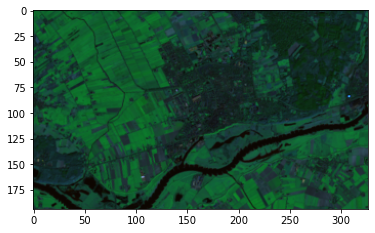

In [181]:
image = ee.Image(collectionList.get(1))#

# Define an area of interest.
aoi = ee.Geometry.Polygon(
  [[[5.588144,51.993435], [5.727906, 51.993435],[5.727906, 51.944356],[5.588144, 51.944356]]], None, False)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = image.sampleRectangle(region=aoi)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

# Transfer the arrays from server to client and cast as np array.
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())


print(min(np_arr_b4.flatten()),min(np_arr_b5.flatten()),min(np_arr_b6.flatten()))
print(max(np_arr_b4.flatten()),max(np_arr_b5.flatten()),max(np_arr_b6.flatten()))

np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)

# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b4, np_arr_b5, np_arr_b6), 2)

plt.imshow(rgb_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0571061372756958 0.043233852833509445 0.01736161671578884
1.6228020191192627 2.1756508350372314 1.491994023323059


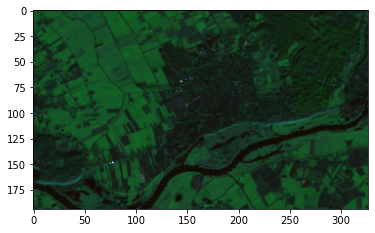

In [182]:
image = ee.Image(collectionList.get(12))#

# Define an area of interest.
aoi = ee.Geometry.Polygon(
  [[[5.588144,51.993435], [5.727906, 51.993435],[5.727906, 51.944356],[5.588144, 51.944356]]], None, False)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = image.sampleRectangle(region=aoi)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

# Transfer the arrays from server to client and cast as np array.
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())


print(min(np_arr_b4.flatten()),min(np_arr_b5.flatten()),min(np_arr_b6.flatten()))
print(max(np_arr_b4.flatten()),max(np_arr_b5.flatten()),max(np_arr_b6.flatten()))

np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)

# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b4, np_arr_b5, np_arr_b6), 2)

plt.imshow(rgb_img)
plt.show()

In [109]:
image = ee.Image(collectionList.get(12))#.clip(region)

parameters = {'min': 0,
              'max': 0.4,
              'bands': ['B4','B3', 'B2'],
              'region': Ituna_AOI }
Image(url = image.getThumbUrl(parameters))